In [149]:
import sqlite3

conn = sqlite3.connect('deliveroo.db')


# Attach the other two databases
conn.execute("ATTACH DATABASE 'takeaway.db' AS tw;")
conn.execute("ATTACH DATABASE 'ubereats.db' AS ue;")

# Verify attached databases
databases = conn.execute("PRAGMA database_list;").fetchall()
print("Attached Databases:")
for db in databases:
    print(db)

Attached Databases:
(0, 'main', 'd:\\Becode\\delivery-market-analysis-with-SQL\\Basma\\deliveroo.db')
(2, 'tw', 'd:\\Becode\\delivery-market-analysis-with-SQL\\Basma\\takeaway.db')
(3, 'ue', 'd:\\Becode\\delivery-market-analysis-with-SQL\\Basma\\ubereats.db')


In [150]:
try:
    # SQL query for deliveroo data
    deliveroo = """
        SELECT
            COUNT(restaurants.id) AS number_of_resturants,
            restaurants.postal_code
        FROM
            restaurants
        WHERE
            restaurants.postal_code <> ''
        GROUP BY
            restaurants.postal_code
        ORDER BY
            number_of_resturants DESC;
    """
    results = conn.execute(deliveroo).fetchall()
    for row in results:
        print(row)

except sqlite3.OperationalError as e:
    print("Error:", e)



(459, '2000')
(427, '9000')
(229, '3000')
(189, '8000')
(128, '2018')
(110, '2800')
(109, '8500')
(77, '3500')
(61, '1180')
(57, '8400')
(54, '1030')
(52, '2600')
(52, '2060')
(45, '1410')
(37, '1200')
(36, '8800')
(35, '1150')
(35, '1090')
(34, '9300')
(29, '9100')
(28, '2140')
(26, '1140')
(26, '1020')
(24, '3600')
(24, '2100')
(19, '8310')
(18, '8200')
(18, '2610')
(17, '2300')
(16, '1800')
(15, '9050')
(15, '1082')
(14, '3800')
(14, '2020')
(13, '1950')
(13, '1190')
(11, '9200')
(11, '1080')
(9, '1083')
(8, '9040')
(8, '2640')
(8, '2170')
(8, '1000')
(7, '3010')
(6, '1160')
(5, '8501')
(5, '3001')
(5, '1853')
(5, '1620')
(4, '2110')
(4, '1780')
(4, '1130')
(4, '1120')
(3, '3511')
(3, '2900')
(3, '2660')
(3, '1600')
(2, '8510')
(2, '8300')
(2, '2030')
(2, '1970')
(2, '1932')
(2, '1831')
(1, '9308')
(1, '9070')
(1, '9041')
(1, '9030')
(1, '4000')
(1, '3360')
(1, '3020')
(1, '3000LEUVEN')
(1, '2812')
(1, '2360')
(1, '2180')
(1, '2160')
(1, '2150')
(1, '2050')
(1, '1930')
(1, '1850')
(

In [151]:
try:
    # SQL query for deliveroo data
    takeawy = """
    SELECT
        COUNT(DISTINCT tw.restaurants.primarySlug) AS number_of_resturants,
        tw.locations.postalCode as postal_code
    FROM
        tw.restaurants
        JOIN tw.locations_to_restaurants ON tw.restaurants.primarySlug = tw.locations_to_restaurants.restaurant_id
        JOIN tw.locations ON tw.locations_to_restaurants.location_id = tw.locations."ID"
    GROUP BY
        tw.locations.postalCode
    ORDER BY
        number_of_resturants DESC;
    """
    results = conn.execute(takeawy).fetchall()
    for row in results:
        print(row)

except sqlite3.OperationalError as e:
    print("Error:", e)


(605, 1140)
(578, 2600)
(570, 2140)
(566, 2018)
(547, 2060)
(534, 2000)
(509, 2100)
(485, 2020)
(422, 2170)
(414, 2030)
(353, 9000)
(345, 2050)
(331, 9050)
(330, 9040)
(285, 9070)
(281, 2610)
(269, 1700)
(264, 1932)
(258, 9030)
(255, 1620)
(251, 2640)
(249, 9032)
(219, 1800)
(219, 1600)
(217, 2660)
(209, 2150)
(203, 3000)
(199, 9820)
(199, 3010)
(197, 3012)
(196, 2900)
(195, 3001)
(193, 9051)
(193, 9031)
(190, 3020)
(186, 2160)
(180, 1780)
(177, 1853)
(164, 1702)
(161, 1731)
(160, 1831)
(150, 9041)
(146, 9052)
(146, 2110)
(146, 1950)
(137, 2650)
(137, 1930)
(133, 1601)
(132, 3360)
(127, 2070)
(127, 1850)
(118, 2800)
(114, 1830)
(113, 1630)
(112, 1701)
(112, 1602)
(110, 8310)
(110, 2860)
(109, 8200)
(109, 8000)
(108, 1650)
(106, 1980)
(105, 3220)
(102, 1970)
(100, 9090)
(94, 8400)
(94, 2812)
(93, 2811)
(93, 1933)
(92, 2180)
(91, 2820)
(88, 2530)
(88, 1981)
(88, 1640)
(85, 3210)
(84, 3050)
(83, 8020)
(82, 1820)
(81, 3080)
(80, 8450)
(80, 1860)
(78, 2930)
(76, 2630)
(75, 9320)
(73, 2550)


In [152]:
try:
    # SQL query for deliveroo data
    ubereats = """
        SELECT
            count(DISTINCT ue.restaurants.id) AS number_of_resturants , ue.locations.region AS postal_code
        FROM
            ue.restaurants
            JOIN ue.locations_to_restaurants ON ue.restaurants.id = ue.locations_to_restaurants.restaurant_id
            JOIN ue.locations ON ue.locations_to_restaurants.location_id = ue.locations.id
        GROUP BY
            ue.locations.region
        Order by number_of_resturants DESC;
            """
    results =conn.execute(ubereats).fetchall()
    for row in results:
        print(row)

except sqlite3.OperationalError as e:
    print("Error:", e)

(667, '2018')
(643, '2140')
(624, '2000')
(623, '2600')
(606, '2060')
(448, '2100')
(358, '2020')
(344, '9000')
(309, '9040')
(292, '9050')
(238, '2170')
(209, '2610')
(200, '3000')
(198, '3001')
(195, '3010')
(187, '1700')
(179, '1950')
(173, '3012')
(165, '9070')
(164, '1702')
(163, '1140')
(162, '9032')
(158, '9030')
(157, '1932')
(133, '1620')
(132, '1800')
(129, '2030')
(127, '1970')
(125, '2640')
(121, '3020')
(121, '2660')
(118, '1853')
(113, '2900')
(110, '2150')
(107, '1831')
(107, '1780')
(103, '1600')
(101, '8310')
(100, '8000')
(98, '2050')
(98, '1731')
(91, '1930')
(91, '1601')
(89, '8200')
(87, '2650')
(87, '2160')
(82, '1640')
(77, '1630')
(71, '2860')
(70, '2800')
(62, '9300')
(61, '9320')
(60, '1701')
(59, '1850')
(57, '1830')
(54, '9308')
(54, '3090')
(53, '8500')
(51, '8400')
(49, '3500')
(49, '2811')
(48, '8530')
(48, '8501')
(45, '9100')
(43, '3511')
(43, '1650')
(42, '9111')
(42, '8520')
(39, '8450')
(39, '2180')
(38, '9820')
(37, '9310')
(37, '8510')
(37, '2070')

In [153]:
combined_query = """
    SELECT 
        'Deliveroo' AS platform, 
        COUNT(restaurants.id) AS number_of_restaurants, 
        cast(restaurants.postal_code as text) as postal_code
    FROM 
        restaurants
    WHERE 
        restaurants.postal_code <> ''
    GROUP BY 
        restaurants.postal_code

    UNION ALL

    SELECT 
        'Takeaway' AS platform, 
        COUNT(DISTINCT tw.restaurants.primarySlug) AS number_of_restaurants, 
        cast(tw.locations.postalCode as text) AS postal_code
    FROM 
        tw.restaurants
        JOIN tw.locations_to_restaurants 
        ON tw.restaurants.primarySlug = tw.locations_to_restaurants.restaurant_id
        JOIN tw.locations 
        ON tw.locations_to_restaurants.location_id = tw.locations."ID"
    GROUP BY 
        tw.locations.postalCode

    UNION ALL

    SELECT 
        'UberEats' AS platform, 
        COUNT(DISTINCT ue.restaurants.id) AS number_of_restaurants, 
        cast(ue.locations.region as text) AS postal_code
    FROM 
        ue.restaurants
        JOIN ue.locations_to_restaurants 
        ON ue.restaurants.id = ue.locations_to_restaurants.restaurant_id
        JOIN ue.locations 
        ON ue.locations_to_restaurants.location_id = ue.locations.id
    GROUP BY 
        ue.locations.region

    ORDER BY 
        number_of_restaurants DESC;
"""
results = conn.execute(combined_query).fetchall()
for row in results:
        print(row)


('UberEats', 667, '2018')
('UberEats', 643, '2140')
('UberEats', 624, '2000')
('UberEats', 623, '2600')
('UberEats', 606, '2060')
('Takeaway', 605, '1140')
('Takeaway', 578, '2600')
('Takeaway', 570, '2140')
('Takeaway', 566, '2018')
('Takeaway', 547, '2060')
('Takeaway', 534, '2000')
('Takeaway', 509, '2100')
('Takeaway', 485, '2020')
('Deliveroo', 459, '2000')
('UberEats', 448, '2100')
('Deliveroo', 427, '9000')
('Takeaway', 422, '2170')
('Takeaway', 414, '2030')
('UberEats', 358, '2020')
('Takeaway', 353, '9000')
('Takeaway', 345, '2050')
('UberEats', 344, '9000')
('Takeaway', 331, '9050')
('Takeaway', 330, '9040')
('UberEats', 309, '9040')
('UberEats', 292, '9050')
('Takeaway', 285, '9070')
('Takeaway', 281, '2610')
('Takeaway', 269, '1700')
('Takeaway', 264, '1932')
('Takeaway', 258, '9030')
('Takeaway', 255, '1620')
('Takeaway', 251, '2640')
('Takeaway', 249, '9032')
('UberEats', 238, '2170')
('Deliveroo', 229, '3000')
('Takeaway', 219, '1800')
('Takeaway', 219, '1600')
('Takeawa

   platform  number_of_restaurants postal_code
0  UberEats                    667        2018
1  UberEats                    643        2140
2  UberEats                    624        2000
3  UberEats                    623        2600
4  UberEats                    606        2060
Index(['platform', 'number_of_restaurants', 'postal_code'], dtype='object')


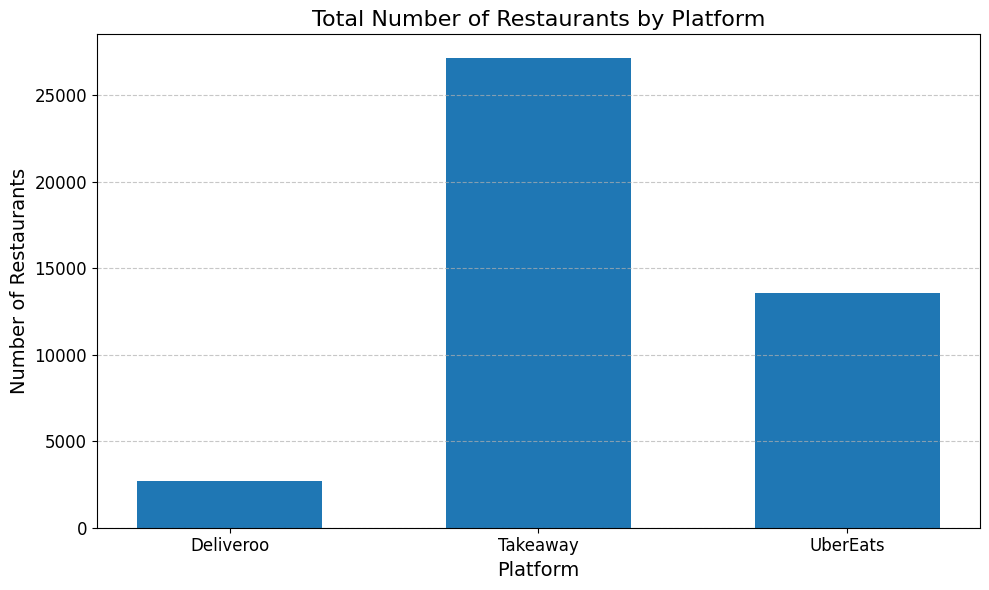

platform     Deliveroo  Takeaway  UberEats
postal_code                               
2000             459.0     534.0     624.0
2018               0.0     566.0     667.0
2140               0.0     570.0     643.0
2600               0.0     578.0     623.0
2060               0.0     547.0     606.0
9000             427.0     353.0     344.0
2100               0.0     509.0     448.0
2020               0.0     485.0     358.0
2170               0.0     422.0     238.0
9040               0.0     330.0     309.0
3000             229.0     203.0     200.0
9050               0.0     331.0     292.0
1140               0.0     605.0       0.0
2610               0.0     281.0     209.0
2030               0.0     414.0       0.0
3010               0.0     199.0     195.0
3001               0.0     195.0     198.0
2050               0.0     345.0       0.0
9070               0.0     285.0       0.0
1700               0.0     269.0       0.0
1932               0.0     264.0       0.0
9030       

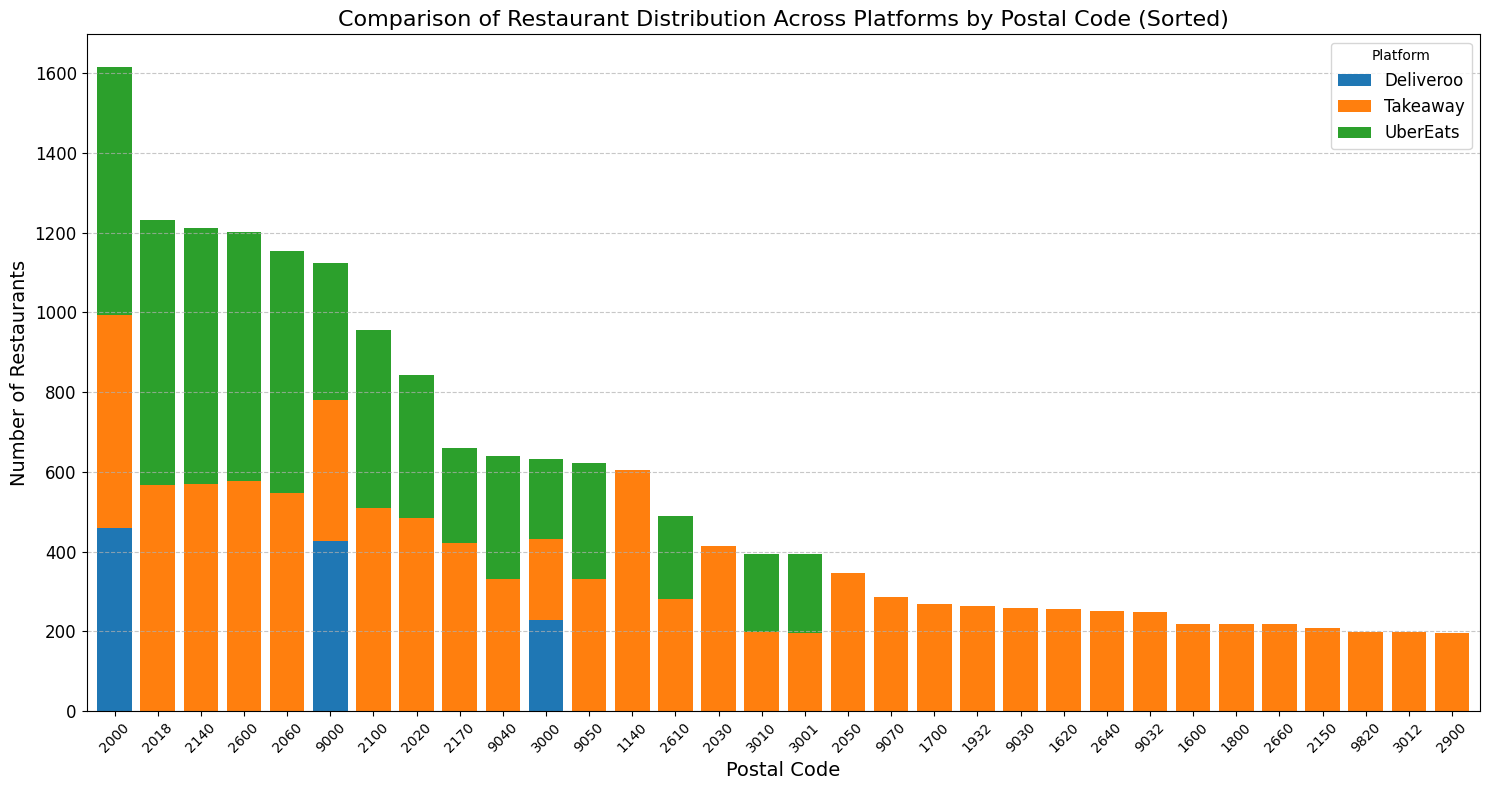

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_sql_query(combined_query, conn)
print(df.head())  # Display the first few rows of the DataFrame
print(df.columns)  # Display the column names in the DataFrame
# Assuming `df` contains the query results
# Columns: 'Platform', 'Number of Restaurants', 'Postal Code'

# Group by Platform and aggregate restaurant counts for overall comparison
platform_summary = df.groupby('platform')['number_of_restaurants'].sum().reset_index()

# Create a bar chart for platform-level comparison
plt.figure(figsize=(10, 6))
plt.bar(platform_summary['platform'], platform_summary['number_of_restaurants'], width=0.6)

# Add title and labels
plt.title('Total Number of Restaurants by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.tight_layout()
plt.show()

# Create a postal code-level stacked bar chart
df = df.head(50)
# Pivot the data for better organization
pivot_df = df.pivot(index='postal_code', columns='platform', values='number_of_restaurants').fillna(0)

# Add a column for the total number of restaurants across platforms
pivot_df['Total Restaurants'] = pivot_df.sum(axis=1)

# Sort by the total number of restaurants in descending order
pivot_df = pivot_df.sort_values(by='Total Restaurants', ascending=False)

# Drop the 'Total Restaurants' column (if not needed for visualization)
pivot_df = pivot_df.drop(columns=['Total Restaurants'])

# Display the sorted DataFrame
print(pivot_df)

# Now you can plot the sorted data
pivot_df.plot(kind='bar', stacked=True, figsize=(15, 8), width=0.8)

# Customize the chart
plt.title("Comparison of Restaurant Distribution Across Platforms by Postal Code (Sorted)", fontsize=16)
plt.ylabel("Number of Restaurants", fontsize=14)
plt.xlabel("Postal Code", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.legend(title="Platform", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the chart
plt.tight_layout()
plt.show()




In [159]:
# Final Query with Embedded Combined Query
final_query = """
SELECT 
    postal_code,
    SUM(deliveroo_restaurants) AS deliveroo_restaurants,
    SUM(takeaway_restaurants) AS takeaway_restaurants,
    SUM(ubereats_restaurants) AS ubereats_restaurants
FROM (
    -- Deliveroo Data
    SELECT
        CAST(restaurants.postal_code AS text) AS postal_code,
        COUNT(restaurants.id) AS deliveroo_restaurants,
        0 AS takeaway_restaurants,
        0 AS ubereats_restaurants
    FROM
        restaurants
    WHERE
        restaurants.postal_code <> ''
    GROUP BY
        CAST(restaurants.postal_code AS TEXT)

    UNION ALL

    -- Takeaway Data
    SELECT
        CAST(tw.locations.postalCode AS TEXT) AS postal_code,
        0 AS deliveroo_restaurants,
        COUNT(DISTINCT tw.restaurants.primarySlug) AS takeaway_restaurants,
        0 AS ubereats_restaurants
    FROM
        tw.restaurants
    JOIN
        tw.locations_to_restaurants 
    ON tw.restaurants.primarySlug = tw.locations_to_restaurants.restaurant_id
    JOIN
        tw.locations 
    ON tw.locations_to_restaurants.location_id = tw.locations.ID
    GROUP BY
        CAST(tw.locations.postalCode AS TEXT)

    UNION ALL

    -- UberEats Data
    SELECT
        CAST(ue.locations.region AS TEXT) AS postal_code,
        0 AS deliveroo_restaurants,
        0 AS takeaway_restaurants,
        COUNT(DISTINCT ue.restaurants.id) AS ubereats_restaurants
    FROM
        ue.restaurants
    JOIN
        ue.locations_to_restaurants 
    ON ue.restaurants.id = ue.locations_to_restaurants.restaurant_id
    JOIN
        ue.locations 
    ON ue.locations_to_restaurants.location_id = ue.locations.id
    GROUP BY
        CAST(ue.locations.region AS TEXT)
) AS combined
GROUP BY postal_code

"""

# Execute the query
results = conn.execute(final_query).fetchall()
for row in results:
    print(row)


('1000', 8, 0, 0)
('1020', 26, 0, 0)
('1030', 54, 0, 0)
('1040', 1, 0, 0)
('1060', 1, 0, 0)
('1080', 11, 0, 0)
('1081', 1, 0, 0)
('1082', 15, 0, 0)
('1083', 9, 0, 0)
('1090', 35, 0, 0)
('1120', 4, 0, 0)
('1130', 4, 0, 0)
('1140', 26, 605, 163)
('1150', 35, 0, 0)
('1160', 6, 0, 0)
('1180', 61, 0, 0)
('1190', 13, 0, 0)
('1200', 37, 0, 0)
('1210', 1, 0, 0)
('1320', 0, 8, 0)
('1330', 1, 0, 0)
('1410', 45, 0, 0)
('1500', 0, 56, 32)
('1501', 0, 44, 35)
('1502', 0, 46, 33)
('1540', 0, 13, 8)
('1541', 0, 13, 3)
('1547', 0, 15, 3)
('1560', 0, 51, 32)
('1570', 0, 15, 3)
('1600', 3, 219, 103)
('1601', 0, 133, 91)
('1602', 0, 112, 27)
('1620', 5, 255, 133)
('1630', 0, 113, 77)
('1640', 0, 88, 82)
('1650', 0, 108, 43)
('1651', 0, 63, 30)
('1652', 0, 52, 29)
('1653', 0, 49, 20)
('1654', 0, 52, 30)
('1670', 0, 24, 5)
('1671', 0, 21, 5)
('1673', 0, 22, 9)
('1674', 0, 18, 5)
('1700', 1, 269, 187)
('1701', 0, 112, 60)
('1702', 1, 164, 164)
('1703', 0, 44, 14)
('1730', 0, 72, 20)
('1731', 0, 161, 98)
('1

   postal_code  deliveroo_restaurants  takeaway_restaurants  \
0         1000                      8                     0   
1         1020                     26                     0   
2         1030                     54                     0   
3         1040                      1                     0   
4         1060                      1                     0   
5         1080                     11                     0   
6         1081                      1                     0   
7         1082                     15                     0   
8         1083                      9                     0   
9         1090                     35                     0   
10        1120                      4                     0   
11        1130                      4                     0   
12        1140                     26                   605   
13        1150                     35                     0   
14        1160                      6                  

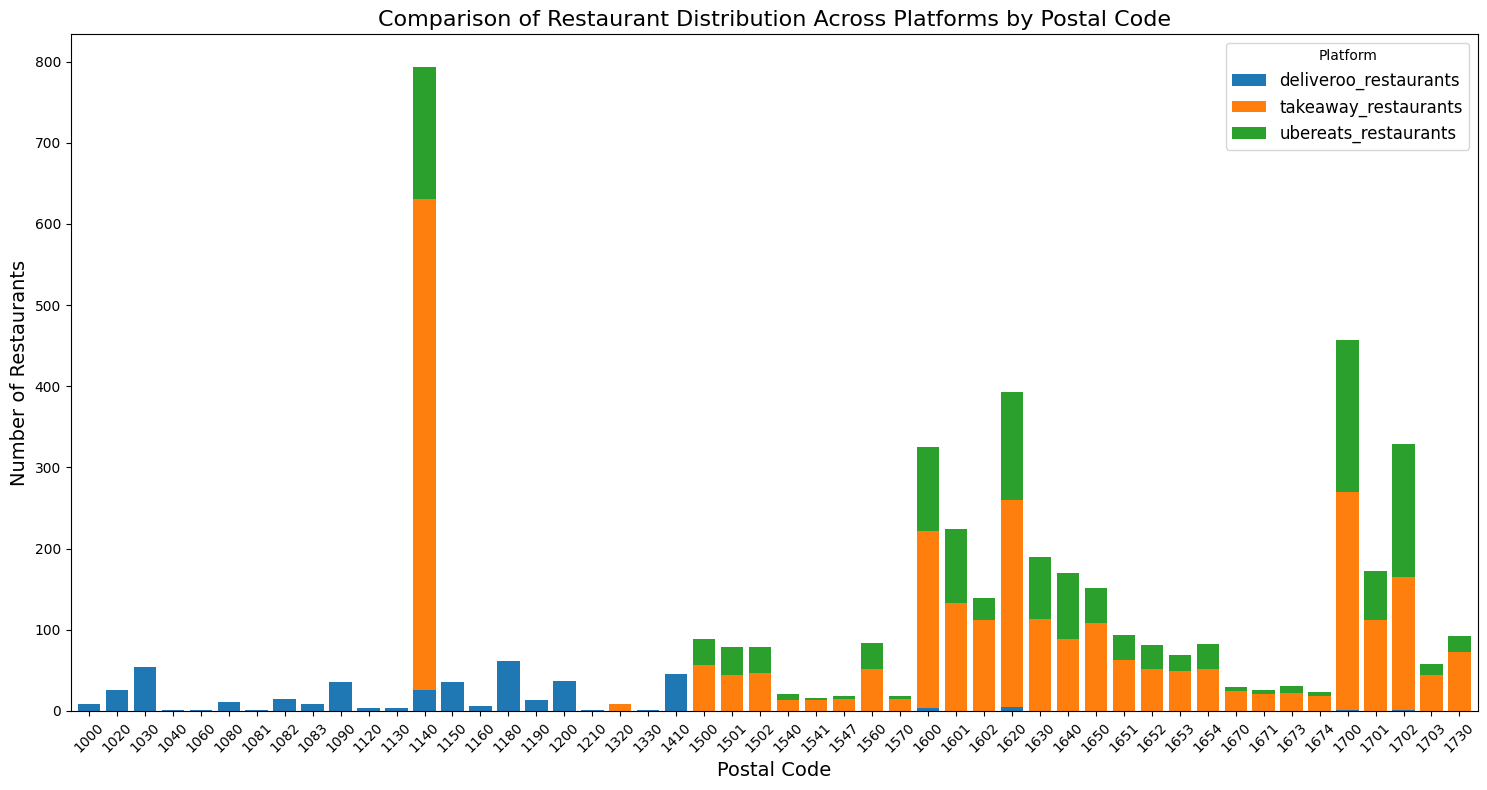

In [158]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_sql_query(final_query, conn)
df = df.head(50)
# Display the DataFrame for verification (optional)
print(df)

# Plot the data
df.set_index('postal_code').plot(kind='bar', stacked=True , figsize=(15, 8), width=0.8)

# Add labels and title
plt.title('Comparison of Restaurant Distribution Across Platforms by Postal Code', fontsize=16)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.xlabel('Postal Code', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Platform', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
# Detach the databases when done
conn.execute("DETACH DATABASE tw;")
conn.execute("DETACH DATABASE ue;")

# Close the connection
conn.close()

